In [175]:
import nltk, re, string, collections
from nltk import ngrams
import numpy as np 
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/medha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
path = "/Users/medha/NLP/assignment1/Sherlock Holmes.txt"
with open(path) as file:
    text = file.read()

# text[0:1000]

In [177]:
#removing XML data
text = re.sub('<.*>', '', text)

#any punctuation removed expect periods
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation) + "]"
text = re.sub(punctuationNoPeriod, "", text)

text[0:1000]

'\nProject Gutenbergs The Adventures of Sherlock Holmes by Arthur Conan Doyle\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever  You may copy it give it away or\nreuse it under the terms of the Project Gutenberg License included\nwith this eBook or online at wwwgutenbergnet\n\n\nTitle The Adventures of Sherlock Holmes\n\nAuthor Arthur Conan Doyle\n\nRelease Date November 29 2002 EBook 1661\nLast Updated May 20 2019\n\nLanguage English\n\nCharacter set encoding UTF8\n\n START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES \n\n\n\nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\n\n\n\ncover\n\n\n\nThe Adventures of Sherlock Holmes\n\n\n\nby Arthur Conan Doyle\n\n\n\nContents\n\n\n   I     A Scandal in Bohemia\n   II    The RedHeaded League\n   III   A Case of Identity\n   IV    The Boscombe Valley Mystery\n   V     The Five Orange Pips\n   VI    The Man with the Twisted Lip\n   VII   The Advent

In [178]:
tokens = text.split()

bigrams = ngrams(tokens, 2)

In [179]:
frequence = nltk.FreqDist(bigrams)
common = frequence.most_common(1000)

print(common)

# for key,value in frequence.items():
#     print(key,value)
# DataFrame = frequence.items()

[(('of', 'the'), 733), (('in', 'the'), 496), (('to', 'the'), 313), (('I', 'have'), 249), (('that', 'I'), 248), (('at', 'the'), 227), (('and', 'I'), 200), (('to', 'be'), 196), (('upon', 'the'), 195), (('and', 'the'), 189), (('with', 'a'), 174), (('of', 'a'), 174), (('I', 'was'), 165), (('was', 'a'), 159), (('I', 'had'), 158), (('with', 'the'), 153), (('that', 'he'), 152), (('it', 'is'), 151), (('that', 'the'), 145), (('is', 'a'), 145), (('it', 'was'), 141), (('said', 'he'), 140), (('in', 'a'), 135), (('from', 'the'), 135), (('of', 'his'), 131), (('I', 'am'), 130), (('have', 'been'), 127), (('into', 'the'), 125), (('and', 'a'), 121), (('by', 'the'), 118), (('in', 'his'), 118), (('had', 'been'), 117), (('that', 'it'), 115), (('on', 'the'), 114), (('for', 'the'), 111), (('to', 'me'), 111), (('said', 'Holmes'), 111), (('It', 'was'), 110), (('he', 'had'), 105), (('that', 'you'), 105), (('he', 'was'), 104), (('which', 'I'), 103), (('as', 'I'), 96), (('a', 'little'), 94), (('It', 'is'), 94), (

In [180]:
unique = set()
for i in range(1000):
  unique.add(common[i][0][1])
  unique.add(common[i][0][0])
vocab_unique = { word:i for i, word in enumerate(unique) }
vocab_unique

{'from': 0,
 'little': 1,
 'house': 2,
 'least': 3,
 'those': 4,
 'always': 5,
 'light': 6,
 'then': 7,
 'let': 8,
 'Foundation': 9,
 'hear': 10,
 'hall': 11,
 'Mrs': 12,
 'stone': 13,
 'world': 14,
 'night': 15,
 'seemed': 16,
 'order': 17,
 'appeared': 18,
 'quite': 19,
 'events': 20,
 'You': 21,
 'They': 22,
 'all': 23,
 'of': 24,
 'end': 25,
 'looked': 26,
 'cab': 27,
 'office': 28,
 'bell': 29,
 'strong': 30,
 'took': 31,
 'give': 32,
 'be': 33,
 'hand': 34,
 'you”': 35,
 'been': 36,
 'go': 37,
 'know': 38,
 '“Oh': 39,
 'centre': 40,
 'Hunter': 41,
 'appears': 42,
 'no': 43,
 'hope': 44,
 'across': 45,
 'became': 46,
 'already': 47,
 'still': 48,
 'years': 49,
 'able': 50,
 'think': 51,
 'Stoner': 52,
 'Adler': 53,
 'at': 54,
 'into': 55,
 'friend': 56,
 'enough': 57,
 'they': 58,
 'near': 59,
 'every': 60,
 'strange': 61,
 'led': 62,
 '“Then': 63,
 'what': 64,
 'She': 65,
 'wife': 66,
 'has': 67,
 'must': 68,
 'his': 69,
 'some': 70,
 'it': 71,
 'find': 72,
 'or': 73,
 'by': 74,


In [181]:
matrix = np.zeros((len(unique), len(unique)))
for i in range(1000):
    current = common[i][0][0]
    previous = common[i][0][1]
    count = common[i][1]
    pos_curr = vocab_unique[current]
    pos_prev = vocab_unique[previous]
    matrix[pos_curr][pos_prev] = count 

<AxesSubplot:>

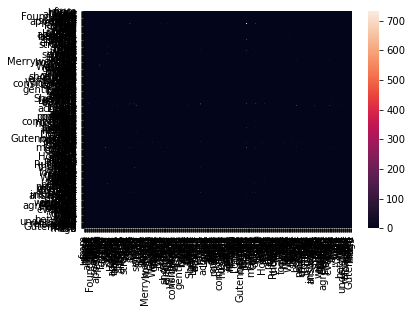

In [182]:
vmin = 0
vmax = 1000
cmap = 'blues'
xticklabels = vocab_unique.keys()
yticklabels = vocab_unique.keys()
sns.heatmap(data = matrix, xticklabels=xticklabels, yticklabels=yticklabels)